### aim: calculate co2 flux from medusa files

### date: 

In [14]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [16]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [28]:
horse = False
if horse:
    # w = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/MEDUSA/SUBSET/medusa_cj200o_1m_20130901-20131001_diad-T_SUBSET.nc')
    # print(w)

    rset = 'medusa_cj200o'
    i = 0
    cj200o_co2flux = np.zeros([300, 332, 362])
    for ty in range(1990,2015):
        for tm in range(1,13):
            if tm <10:
                ttm = f'0{tm}'
            else:
                ttm = tm

            ts = f'{ty}{ttm}'
            q = glob.glob(f'/gpfs/home/mep22dku/scratch/MEDUSA/SUBSET/{rset}_1m_{ty}{ttm}01-*SUBSET.nc')
            tdat = xr.open_dataset(q[0])
            print(q[0])
            cj200o_co2flux[i,:,:] = tdat['CO2FLUX'][0,:,:]
            print(np.nansum(cj200o_co2flux[i,:,:]))
            i = i+1
    print(i)
    pickle.dump(cj200o_co2flux, open("medusa_cj200o_CO2FLUX_1990_2015.pkl", 'wb'))

# horse = True
if horse:
    # w = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/MEDUSA/SUBSET/medusa_cj198o_1m_20130901-20131001_diad-T_SUBSET.nc')
    # print(w)

    rset = 'medusa_cj198o'
    i = 0
    cj198o_co2flux = np.zeros([300, 332, 362])
    for ty in range(1990,2015):
        for tm in range(1,13):
            if tm <10:
                ttm = f'0{tm}'
            else:
                ttm = tm

            ts = f'{ty}{ttm}'
            q = glob.glob(f'/gpfs/home/mep22dku/scratch/MEDUSA/SUBSET/{rset}_1m_{ty}{ttm}01-*SUBSET.nc')
            tdat = xr.open_dataset(q[0])
            cj198o_co2flux[i,:,:] = tdat['CO2FLUX'][0,:,:]
            i = i+1
            print(i)
    print(i)
    pickle.dump(cj198o_co2flux, open("medusa_cj198o_CO2FLUX_1990_2015.pkl", 'wb'))

In [29]:
#prasime_veci
dim = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
mos = np.arange(1,13,1)
yrs = np.arange(1990,2015,1)
print(np.shape(yrs))

yrsrep = np.zeros(300)
mosrep = np.zeros(300)
dimrep = np.zeros(300)

for i in range(0,25):
    yrsrep[i*12:i*12+12] = 1990+i
    mosrep[i*12:i*12+12] = mos
    dimrep[i*12:i*12+12] = dim
    
# print(mosrep)


(25,)


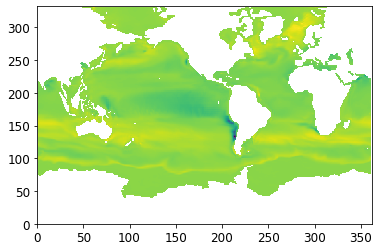

In [30]:
cj200o_co2flux = pickle.load(open('medusa_cj200o_CO2FLUX_1990_2015.pkl', 'rb'))
cj198o_co2flux = pickle.load(open('medusa_cj198o_CO2FLUX_1990_2015.pkl', 'rb'))

plt.pcolormesh(cj198o_co2flux[30,:,:])

In [20]:
yrslog = np.arange(1990,2015,1/12)
print(np.shape(yrslog))

(300,)


In [21]:
w = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/MEDUSA/SUBSET/medusa_cj200o_1m_20130901-20131001_diad-T_SUBSET.nc')
tar = (w['area'].values)
nav_lat = (w['nav_lat'])
print(w.area)
print(w.CO2FLUX)
## 113 is the nav lat boundary



<xarray.DataArray 'area' (y: 332, x: 362)>
array([[1.600000e+01, 1.600000e+01, 1.600000e+01, ..., 1.600000e+01,
        1.600000e+01, 1.600000e+01],
       [1.600000e+01, 1.600000e+01, 1.600000e+01, ..., 1.600000e+01,
        1.600000e+01, 1.600000e+01],
       [1.600000e+01, 1.600000e+01, 1.600000e+01, ..., 1.600000e+01,
        1.600000e+01, 1.600000e+01],
       ...,
       [4.967845e+07, 4.967845e+07, 1.681953e+08, ..., 1.681953e+08,
        4.967845e+07, 4.967845e+07],
       [3.180358e+07, 3.180358e+07, 1.550036e+08, ..., 1.550036e+08,
        3.180358e+07, 3.180358e+07],
       [3.180358e+07, 3.180358e+07, 1.550036e+08, ..., 1.550036e+08,
        3.180358e+07, 3.180358e+07]], dtype=float32)
Dimensions without coordinates: y, x
Attributes:
    standard_name:  cell_area
    units:          m2
<xarray.DataArray 'CO2FLUX' (time_counter: 1, y: 332, x: 362)>
[120184 values with dtype=float32]
Dimensions without coordinates: time_counter, y, x
Attributes:
    long_name:           Air-s

In [31]:
siy = 60*60*24*365
pg_in_mol = 12 * 1e-15
pg_in_mmol = 12 * 1e-18
diy = 365


Acj198o_co2flux_so = np.zeros([300])
Acj198o_co2flux = np.zeros([300])
Acj200o_co2flux_so = np.zeros([300])
Acj200o_co2flux = np.zeros([300])

for i in range(0,300):
    Acj198o_co2flux_so[i] = np.nansum(cj198o_co2flux[i,0:113,:] * tar[0:113,:])* pg_in_mmol * dimrep[i]
    Acj198o_co2flux[i] = np.nansum(cj198o_co2flux[i,:,:] * tar[:,:])* pg_in_mmol * dimrep[i]
    Acj200o_co2flux_so[i] = np.nansum(cj200o_co2flux[i,0:113,:] * tar[0:113,:])* pg_in_mmol * dimrep[i]
    Acj200o_co2flux[i] = np.nansum(cj200o_co2flux[i,:,:] * tar[:,:]) * pg_in_mmol * dimrep[i]

## per month

Text(0.5, 0.98, 'monthly carbon uptake (pG CO2)) in UKESM1-MEDUSA \n 2 ozone scenarios 1990-2015 \n top plot global, bottom SO')

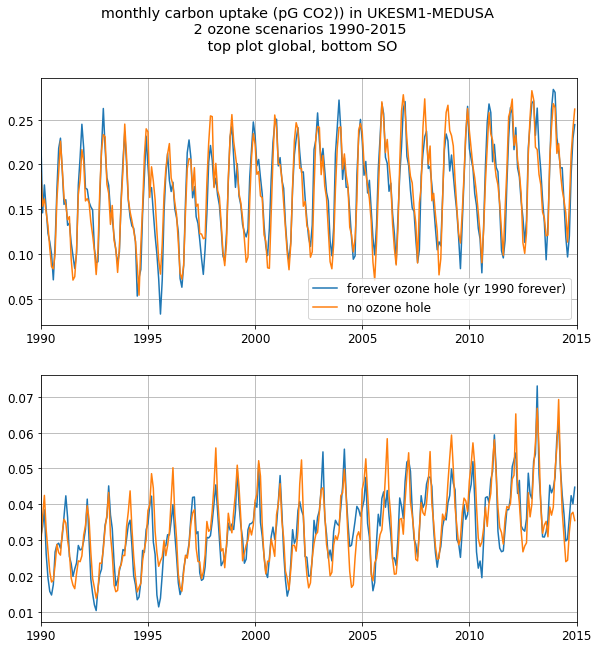

In [45]:

fact = 2
fig, axs = plt.subplots(2,1, figsize=(4.8*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(yrslog,Acj200o_co2flux, label = 'forever ozone hole (yr 1990 forever)')
axs[0].plot(yrslog,Acj198o_co2flux, label = 'no ozone hole')
axs[1].plot(yrslog,Acj200o_co2flux_so, label = 'forever ozone hole (yr 1990 forever)')
axs[1].plot(yrslog,Acj198o_co2flux_so, label = 'no ozone hole')

axs[0].legend()

for i in range(0,2):
    axs[i].grid()
    axs[i].set_xlim([1990,2015])
plt.suptitle('monthly carbon uptake (pG CO2)) in UKESM1-MEDUSA \n 2 ozone scenarios 1990-2015 \n top plot global, bottom SO')

In [46]:
Ycj198o_co2flux_so = np.zeros([25])
Ycj198o_co2flux = np.zeros([25])
Ycj200o_co2flux_so = np.zeros([25])
Ycj200o_co2flux = np.zeros([25])

for y in range(1990,2015):
    Ycj200o_co2flux[y-1990] = np.nansum(Acj200o_co2flux[yrsrep ==y])
    Ycj200o_co2flux_so[y-1990] = np.nansum(Acj200o_co2flux_so[yrsrep ==y])
    Ycj198o_co2flux[y-1990] = np.nansum(Acj198o_co2flux[yrsrep ==y])
    Ycj198o_co2flux_so[y-1990] = np.nansum(Acj198o_co2flux_so[yrsrep ==y])    
# plt.plot(Ycj200o_co2flux)

Text(0.5, 0.98, 'yearly carbon uptake (pG CO2)) in UKESM1-MEDUSA \n 2 ozone scenarios 1990-2015 \n (bottom plot is SO)')

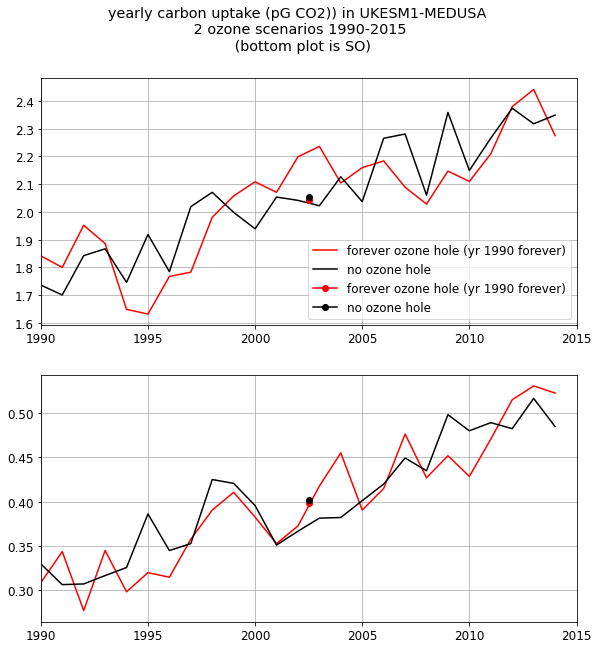

In [49]:

fact = 2
fig, axs = plt.subplots(2,1, figsize=(4.8*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(np.arange(1990,2015,1),Ycj200o_co2flux, color = 'r', label = 'forever ozone hole (yr 1990 forever)')
axs[0].plot(np.arange(1990,2015,1),Ycj198o_co2flux, color = 'k', label = 'no ozone hole')
axs[1].plot(np.arange(1990,2015,1),Ycj200o_co2flux_so, color = 'r', label = 'forever ozone hole (yr 1990 forever)')
axs[1].plot(np.arange(1990,2015,1),Ycj198o_co2flux_so, color = 'k', label = 'no ozone hole')
axs[0].plot(2002.5,np.nanmean(Ycj200o_co2flux), marker = 'o', color = 'r', label = 'forever ozone hole (yr 1990 forever)')
axs[0].plot(2002.5,np.nanmean(Ycj198o_co2flux), marker = 'o', color = 'k', label = 'no ozone hole')
axs[1].plot(2002.5,np.nanmean(Ycj200o_co2flux_so), marker = 'o', color = 'r', label = 'forever ozone hole (yr 1990 forever)')
axs[1].plot(2002.5,np.nanmean(Ycj198o_co2flux_so), marker = 'o', color = 'k', label = 'no ozone hole')

axs[0].legend()

for i in range(0,2):
    axs[i].grid()
    axs[i].set_xlim([1990,2015])
plt.suptitle('yearly carbon uptake (pG CO2)) in UKESM1-MEDUSA \n 2 ozone scenarios 1990-2015 \n (bottom plot is SO)')